# Housing Prices in California

Use the data to model housing prices in California. 

- Dataset: California census data

## Frame the problem:

- What exactly the business objective is?
- How does the company expect to use and benefit from this model?
_ Once you know the objective, it is then easier to find out which algorithm to use, and how much effort you would need to tweek it?


- Is it supervised or unsupervised learning or Reinforcement learning?
- Is it a classification task, a regression task, or somethign else?
- Should you use batch learning or online learning techniques?

- It is clearning a supervised learning task, since you are given labeled training examples.

- it is also a typical regression task, since you are asked predict a value

# Select a performance mesure

RSME$(\textbf{X},h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m} \Big( h(\textbf{x}^{(i)}) - y^{(i)}\Big)^2}$


We can also use another performance measure. Suppose there are many outlier district, in that case, you may consider using the $\textit{mean absolute value}$.

MAE$(\textbf{X},h) = \frac{1}{m}\sum_{i=1}^{m} \Big| h(\textbf{x}^{(i)} - y^{(i)})\Big|$

- The higher the norm index, the more it focuses on large values. This is why RMSE is more sensitive to outloiers than the MAE. But when outliers are exponentially rare, the RMSE performs very wekk and is generally preferred. 

# Download the Data




In [1]:
import os
import tarfile
import urllib

In [2]:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")

HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# creates a dataset/housing directory in your workspace, downloads the housing data,
# and extracts the housing.csv file from it in this directory


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Take a quick look at the Data Structure

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


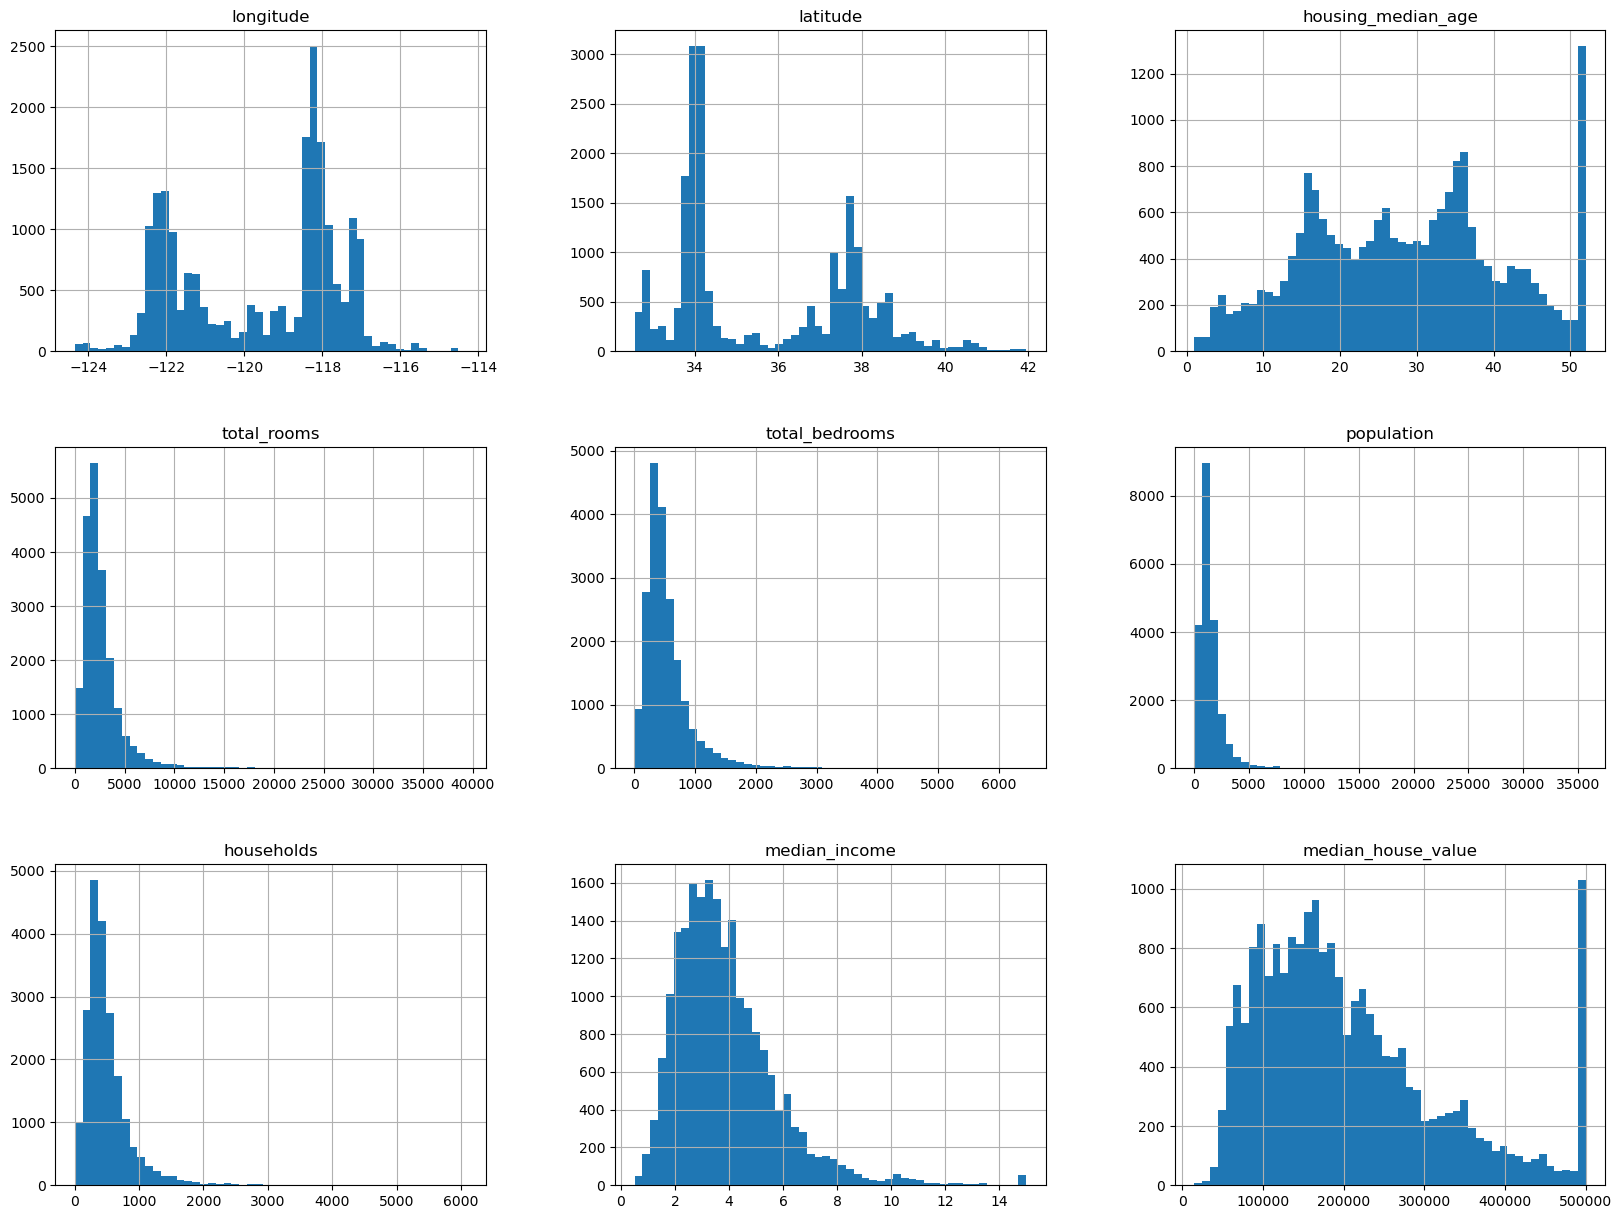

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

- Understand how the data was computed
- Median income attribute is given in tens of thousands of dollars
- histograms are tail heavy. This make it a bit harder for many ML algorithms to detect patterns. Need more bell-shaped distributions

## Create a Test Set

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set))

print(len(test_set))

16512
4128


In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

- This random sampling method is great if the dataset is large, otherwise we can run into sampling bias problem

<AxesSubplot:>

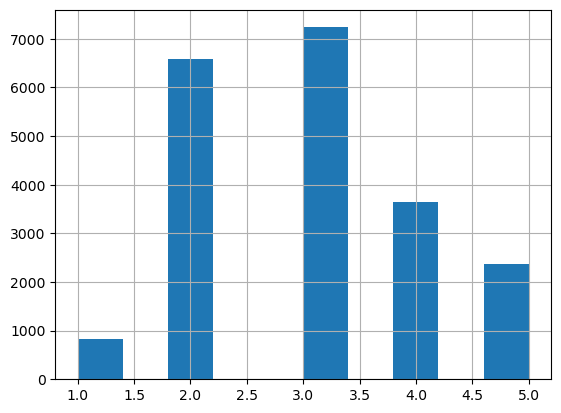

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0,1.5,3.0,4.5, 6, np.inf],
                              labels = [1,2,3,4,5])

housing['income_cat'].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size=0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [14]:
# now remove the income category attribute so the data is in the original form

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace = True)

## Visulaise the Data to gain some insight

In [15]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

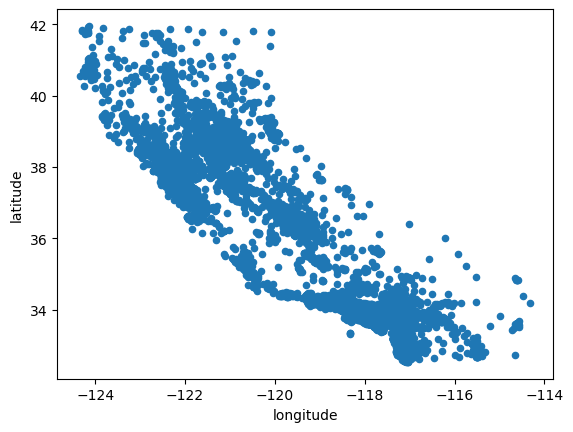

In [16]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

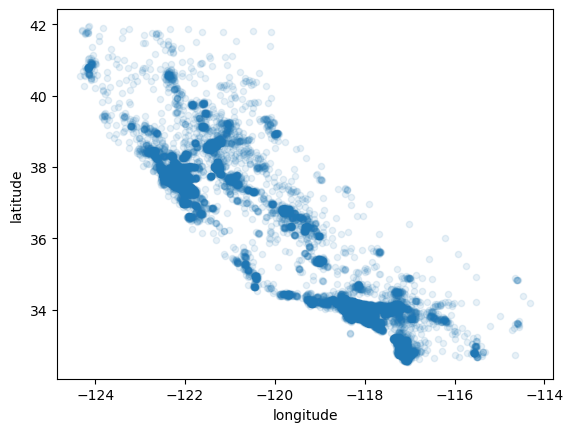

In [17]:
# alpha = 0.1 highlights high density regions 
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha=0.1)

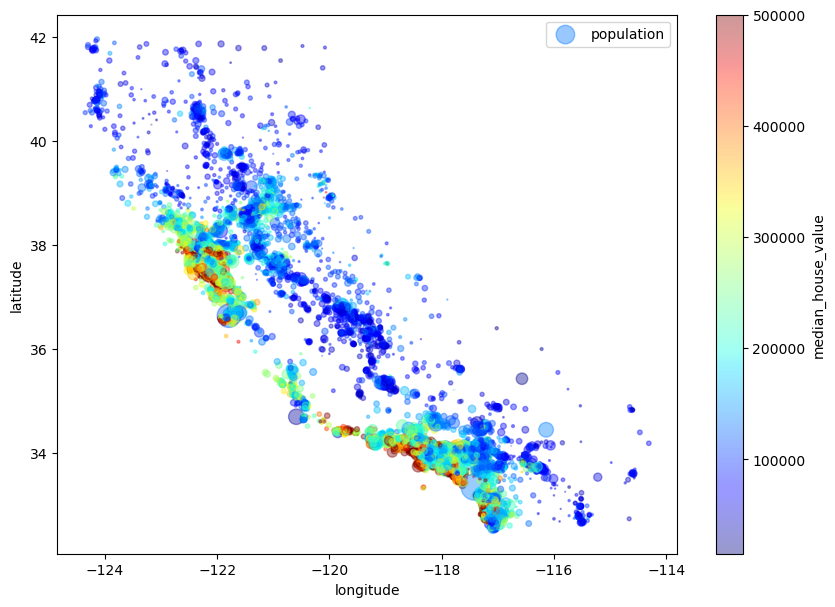

In [18]:
# radius of each circle represents the district population
# the color represents the price
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha=0.4,
            s = housing['population']/100, label = 'population', figsize= (10,7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

plt.show()

This image tells you that the housing prices depends pretty much on the location and to the population density

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686979
total_rooms           0.139821
housing_median_age    0.098470
households            0.069620
total_bedrooms        0.054386
population           -0.021894
longitude            -0.043389
latitude             -0.144899
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

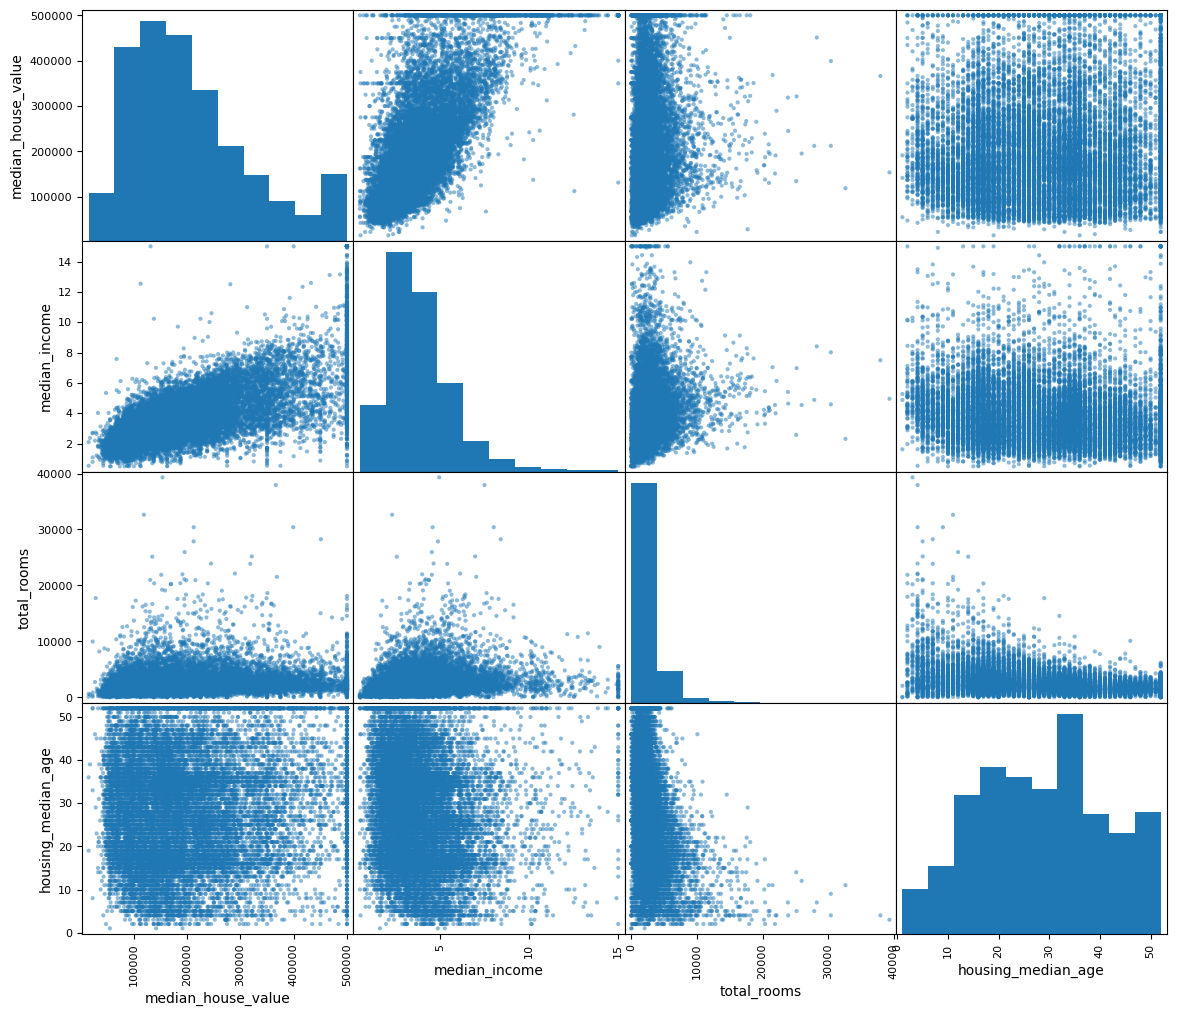

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(14,12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

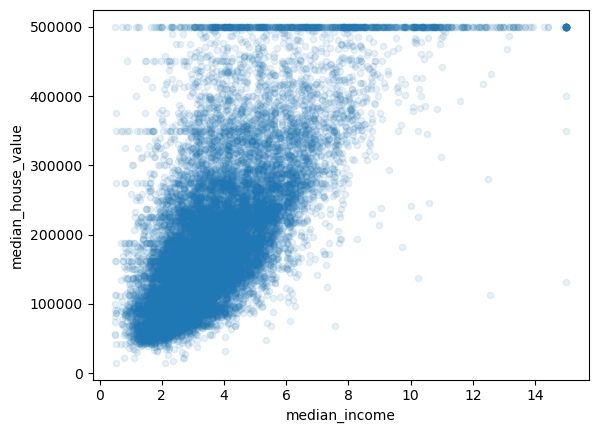

In [21]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha=0.1)

## Experimenting with Attribute Combinations

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.686979
rooms_per_household         0.154150
total_rooms                 0.139821
housing_median_age          0.098470
households                  0.069620
total_bedrooms              0.054386
population                 -0.021894
population_per_household   -0.027445
longitude                  -0.043389
latitude                   -0.144899
bedrooms_per_room          -0.256349
Name: median_house_value, dtype: float64

## Prepare the Data for ML algortihms 

In [24]:
housing = strat_train_set.drop('median_house_value', axis = 1)
hosuing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning

1. Get rid of the corresponding districts 
2. Get rid of the whole attribute
3. Set the values to some value (zero, the mean, the median, ...)

In [25]:
housing.dropna(subset = ['total_bedrooms']) # option 1
housing.drop('total_bedrooms', axis=1) # option 2
median = housing['total_bedrooms'].median() # option 3

housing['total_bedrooms'].fillna(median, inplace = True)

In [56]:
# use scikit-learn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [59]:
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [60]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [62]:
X = imputer.transform(housing_num)

In [63]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [5]:
!pip install torch

You should consider upgrading via the '/opt/intel/oneapi/intelpython/latest/bin/python -m pip install --upgrade pip' command.


In [26]:
import torch
import torch.nn as nn
lin = nn.Linear(5, 7)
data = (torch.randn(3, 5))

print(lin(data).shape)

torch.Size([3, 7])
